In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("twitter_dataset.csv")
data

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21
...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:20
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:54
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:08
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:35


In [3]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [4]:
data['Sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [5]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,0.115714
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,0.308333
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,0.220000
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,0.054762
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,0.033333


In [6]:
data['Sentiment Category'] = data['Sentiment'].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

In [7]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment,Sentiment Category
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,0.115714,Positive
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,0.308333,Positive
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,0.220000,Positive
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,0.054762,Positive
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,0.033333,Positive


In [8]:
sentiment_counts = data['Sentiment Category'].value_counts()

In [9]:
sentiment_counts

Sentiment Category
Positive    7732
Negative    2066
Neutral      202
Name: count, dtype: int64

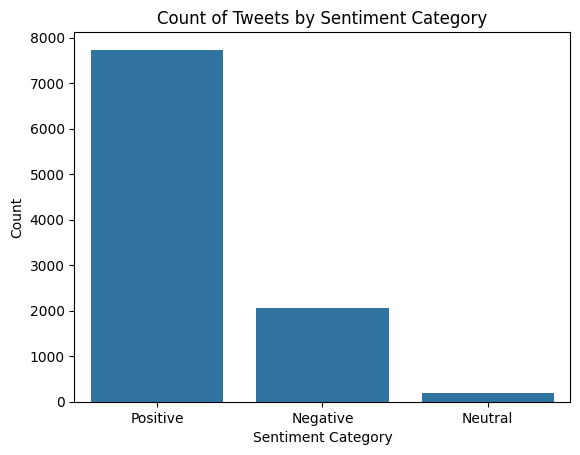

In [10]:
sns.countplot(x='Sentiment Category', data=data)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Tweets by Sentiment Category')
plt.show()

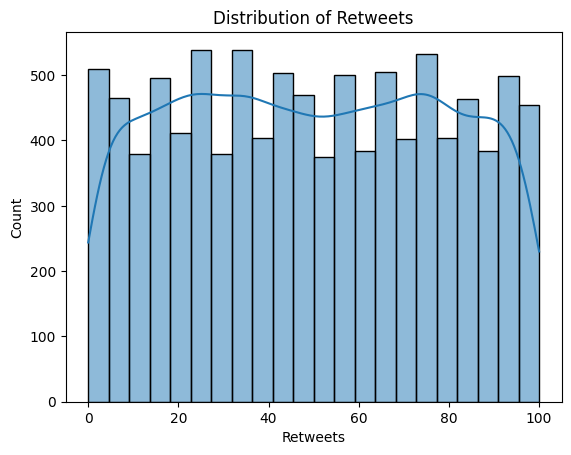

In [11]:
sns.histplot(data['Retweets'], kde=True)
plt.xlabel('Retweets')
plt.ylabel('Count')
plt.title('Distribution of Retweets')
plt.show()

In [12]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [13]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment,Sentiment Category
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,0.115714,Positive
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,0.308333,Positive
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,0.220000,Positive
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,0.054762,Positive
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,0.033333,Positive


In [14]:
data.set_index('Timestamp', inplace=True)

In [15]:
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Sentiment,Sentiment Category
Timestamp,,,,,,,
2023-01-30 11:00:51,1,julie81,Party least receive say or single. Prevent pre...,2,25,0.115714,Positive
2023-01-02 22:45:58,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,0.308333,Positive
2023-01-18 11:25:19,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,0.220000,Positive
2023-04-10 22:06:29,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,0.054762,Positive
2023-01-24 07:12:21,5,carlwarren,Involve sense former often approach government...,27,80,0.033333,Positive


In [16]:
daily_tweet_count = data['Tweet_ID'].resample('D').count()

In [17]:
daily_tweet_count

Timestamp
2023-01-01    67
2023-01-02    85
2023-01-03    83
2023-01-04    74
2023-01-05    82
              ..
2023-05-11    86
2023-05-12    85
2023-05-13    62
2023-05-14    65
2023-05-15    24
Freq: D, Name: Tweet_ID, Length: 135, dtype: int64

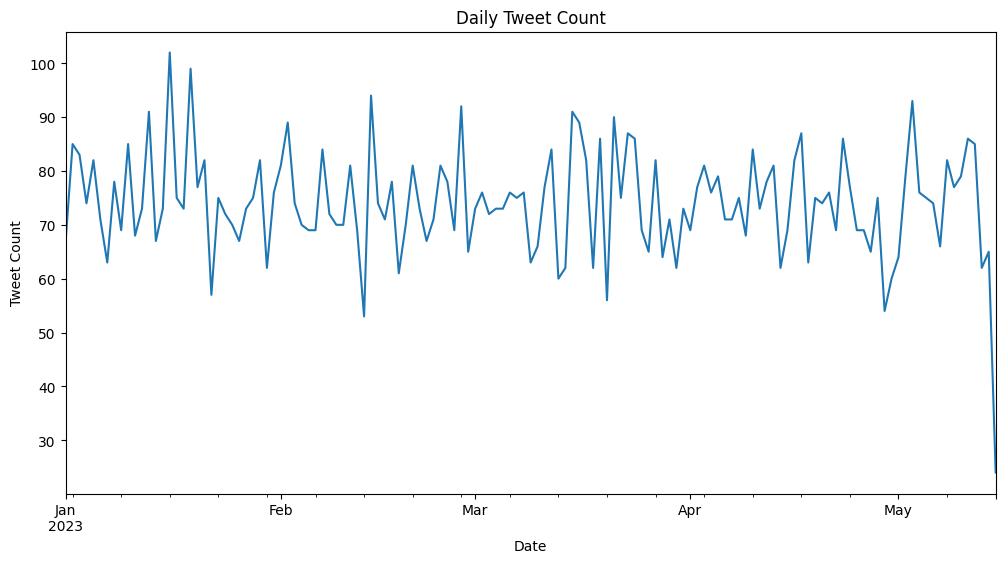

In [18]:
plt.figure(figsize=(12, 6))
daily_tweet_count.plot()
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count')
plt.show()